## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

sns.set_context("notebook", font_scale=1.2)

import warnings
warnings.filterwarnings("ignore")

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [2]:
titanic_dataset = pd.read_csv("titanic.csv")

titanic_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [3]:
titanic_dataset.shape

(891, 12)

In [4]:
titanic_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [5]:
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print((titanic_dataset.isna().sum().Age / titanic_dataset.PassengerId.count() ) * 100)
print((titanic_dataset.isna().sum().Cabin / titanic_dataset.PassengerId.count() ) * 100)

19.865319865319865
77.10437710437711


Ваші висновки:

По цьому опису ми можемо бачити максимальні та мінімальні значення різних змінних у цьому датасеті. Середні значення та числові відхилення. \
Показує 25, 50 та 75 квартилі, з яких можна зрозуміти, що половина пасажирів, були в районі від **20 до 38** років. \
Ще видно, що у **19.8%** пасажирів відстутній вік, та у **77.1%** пасажирів відсутній номер каюти. \
Каюту можна дропнуть.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



<Figure size 1600x1600 with 0 Axes>

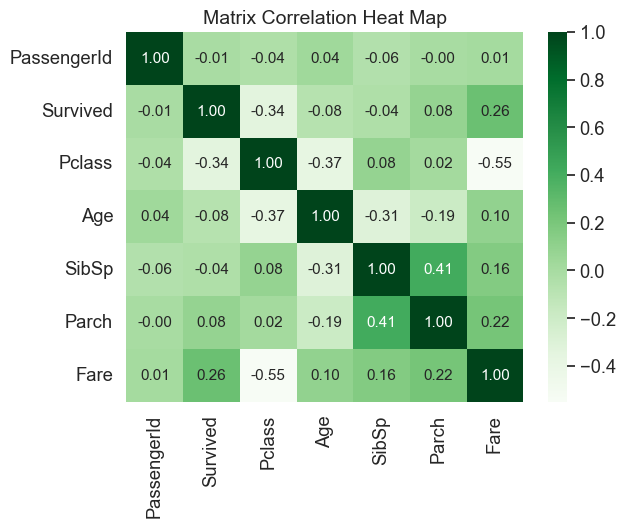

<Figure size 1600x1600 with 0 Axes>

In [7]:
titanic_correlation = titanic_dataset.select_dtypes(include={"float64", "int64"}).corr(method='pearson')
sns.heatmap(titanic_correlation, annot=True ,cmap='Greens', fmt='.2f', annot_kws={"size": 11})
plt.title("Matrix Correlation Heat Map", fontsize=14)
plt.figure(figsize=(16, 16))

Ваші висновки:

По цій тепловій карті ми можемо побачити, що найбільшу від'ємну лінійну залежність мають атрибути Fare та Pclass. \
Найбільшу додатню лінійну залежність мають атрибути Parch та SibSp, \
що представляють з себе кількість батьків/дітей та кількість братів/сестер. \
В основному по цій карті видно, що більшість атрибутів тут, не мають лінійної залежності між собою.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [8]:
def fill_na(df: pd.DataFrame, column: str):
    df.Age = df[column].fillna(df[column].mean())
    return df

titanic_dataset = fill_na(titanic_dataset, 'Age')
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки:

Функція заповнює даний нам стовпчик датасету медіаною значеннь цього стовпчику. З датасету ми можемо побачити, що найбільш резоно \
буде заповнити атрибут Age, тому що в нього всього лиш **20%** пропущених даних. Cabin **80%** пропущених, тому його можна \
просто видалити звідси, що ми і зробимо в наступних кроках. І з останнім атрибутом Embarked, в якого пропущені тільки 2 значення, \
ми розберемось згодом.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





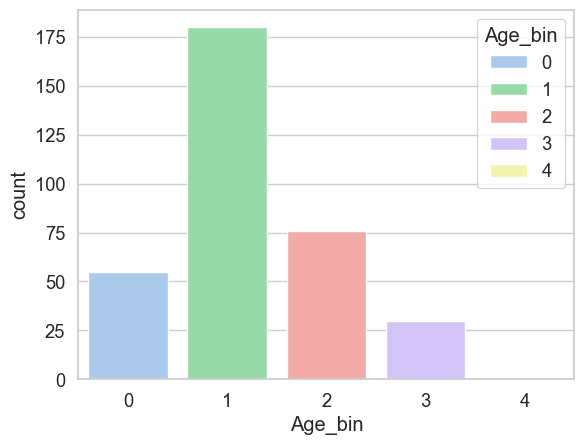

In [9]:
titanic_dataset['Age_bin'] = pd.cut(titanic_dataset.Age, bins=5, labels=[0, 1, 2, 3, 4])

sns.countplot(data=titanic_dataset[titanic_dataset['Survived'] == 1], x='Age_bin', palette='pastel6', hue='Age_bin')
plt.show()

Ваші висновки:

Ми перетворили числові змінні, у категоріальні поділивши їх на 5 груп. Як видно на графіку найбільша кількість виживших пасажирів \
зосереджена у **1** частині. Цей аналіз допомагає визначити, як різні вікові групи впливають на шанси вижити в катастрофі. \
Але всеодно ми ще потребуємо подальшого аналізу цих даних, для кращого розуміння.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [10]:
titanic_dataset["Fare_Category"] = pd.qcut(titanic_dataset.Fare, q=4, )
value_difference = titanic_dataset.groupby(titanic_dataset.Fare_Category).Survived.sum()
value_difference

Fare_Category
(-0.001, 7.91]      44
(7.91, 14.454]      68
(14.454, 31.0]     101
(31.0, 512.329]    129
Name: Survived, dtype: int64

Ваші висновки:

Після кодування атрибуту Fare до порядкової шкали, ми бачимо, що різниця між кількістью виживших пасажирів відрізняються один від одного. \
Тому з цього ми можемо зробити висновок, що використання цієї змінної в подальшому аналізі може бути **доцільним**, для виявлення нових кореляцій.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [11]:
titanic_dataset['Family_size'] = titanic_dataset['Parch'] + titanic_dataset['SibSp']
titanic_dataset['Alone'] = titanic_dataset['Family_size'].apply(lambda x: True if x == 0 else False)
titanic_dataset.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_Category,Family_size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 7.91]",1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(31.0, 512.329]",1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(7.91, 14.454]",0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(31.0, 512.329]",1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,"(7.91, 14.454]",0,True


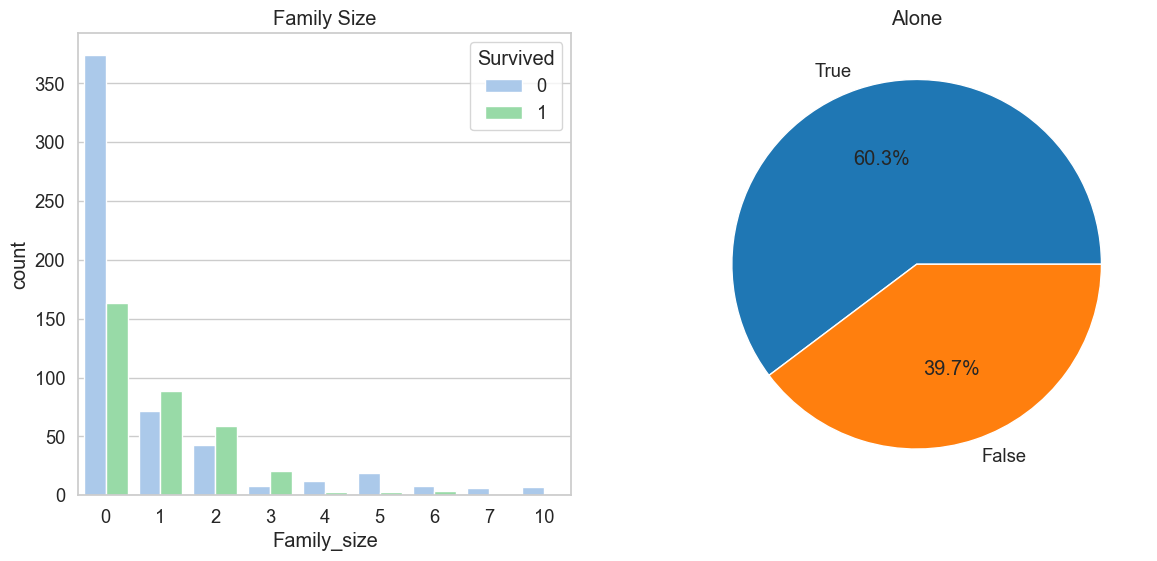

In [12]:
_, axes = plt.subplots(ncols=2, figsize=(14, 6))

sns.countplot(titanic_dataset, x="Family_size", ax=axes[0], hue="Survived", palette='pastel6')
axes[1].pie(x=[titanic_dataset["Alone"].value_counts()[0], titanic_dataset["Alone"].value_counts()[1]], labels=[True, False], autopct='%.1f%%')
axes[1].set_title("Alone")
axes[0].set_title("Family Size")
plt.show()

Ваші висновки:

Ми об'єднали атрибути **SibSp** та **Parch** в одну комбіновану змінну **Family Size**, яка показує нам чи залежить кількість людей в сім'ї, \
від їх шансу на виживання. Як бачимо по графіках, **60%** пасажирів подорожували самі. Тому їх загинуло сама найбільша кількість, так само, як \
і вижило. Але якщо дивитись далі, то видно, що чим більша була сім'я, тим був менший шанс на порятунок. Тому в цілому ми можемо підтвердити гіпотезу, що виживання пасажирів все таки залежило від кількості членів у їх сім'ях.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [13]:
titanic_dataset = titanic_dataset.drop({'Cabin', 'Ticket', 'Name', "Parch", "SibSp"}, axis=1)
titanic_dataset

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Age_bin,Fare_Category,Family_size,Alone
0,1,0,3,male,22.000000,7.2500,S,1,"(-0.001, 7.91]",1,False
1,2,1,1,female,38.000000,71.2833,C,2,"(31.0, 512.329]",1,False
2,3,1,3,female,26.000000,7.9250,S,1,"(7.91, 14.454]",0,True
3,4,1,1,female,35.000000,53.1000,S,2,"(31.0, 512.329]",1,False
4,5,0,3,male,35.000000,8.0500,S,2,"(7.91, 14.454]",0,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,13.0000,S,1,"(7.91, 14.454]",0,True
887,888,1,1,female,19.000000,30.0000,S,1,"(14.454, 31.0]",0,True
888,889,0,3,female,29.699118,23.4500,S,1,"(14.454, 31.0]",3,False
889,890,1,1,male,26.000000,30.0000,C,1,"(14.454, 31.0]",0,True


Ваші висновки:

Як я зазначав раніше, атрибут **Cabin** не показує нам дуже важливі дані, які потрібні були б для аналізу. І ще враховуючи що там пропущених значень,
в **80%**, ми точно повинні видалити цей атрибут з датасету, аби запобігти помилок. \
Атрибут **Ticket**, я теж врахував як нерелавантим для аналізу цього датасету, тому що він не несе якоїсь користі в аналізі даних, тому що кожне \
значення там є унікальним, і не дуже багато говорить нам про пасажира. На заміну його у нас є атрибут **Pclass**. \
Далі я видалив атрибут **Name** тому що, він так само не несе нам великої користі тут.
І останніми, я важжаю, що можна було скоротити кількість атрибутів лишивши тільки **Family_Size**, тому я ще видалив **SibSp та Parch**. \
Це те саме, що і **Family Size**, тому можна від них позбавитись.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [14]:
titanic_dataset['Sex'] = titanic_dataset['Sex'].apply(lambda x: 0 if x == "male" else 1)

most_embarked = titanic_dataset["Embarked"].value_counts().axes[0][0]

titanic_dataset['Embarked'] = titanic_dataset['Embarked'].fillna(most_embarked)
titanic_dataset['Embarked'] = titanic_dataset['Embarked'].apply(lambda x: 0 if x == "S" else (1 if x == "C" else (2 if x == "Q" else None))).astype(int)

titanic_dataset.sample(20)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Age_bin,Fare_Category,Family_size,Alone
162,163,0,3,0,26.000000,7.7750,0,1,"(-0.001, 7.91]",0,True
547,548,1,2,0,29.699118,13.8625,1,1,"(7.91, 14.454]",0,True
363,364,0,3,0,35.000000,7.0500,0,2,"(-0.001, 7.91]",0,True
725,726,0,3,0,20.000000,8.6625,0,1,"(7.91, 14.454]",0,True
362,363,0,3,1,45.000000,14.4542,1,2,"(7.91, 14.454]",1,False
217,218,0,2,0,42.000000,27.0000,0,2,"(14.454, 31.0]",1,False
729,730,0,3,1,25.000000,7.9250,0,1,"(7.91, 14.454]",1,False
358,359,1,3,1,29.699118,7.8792,2,1,"(-0.001, 7.91]",0,True
468,469,0,3,0,29.699118,7.7250,2,1,"(-0.001, 7.91]",0,True
842,843,1,1,1,30.000000,31.0000,1,1,"(14.454, 31.0]",0,True


Ваші висновки:

З атрибутом **Sex** все просто, **male-female** заміняємо на **0-1**. \
А вже з атрибутом **Embarked** є маленька проблема, він має 2 пропущених значення, які я замінив на найпопулярніший порт посадки **S**. \
І перевів його також в числові значення ```0 - S, 1 - C, 3 - Q```. \
З атрибутом **Title** я не зміг розібратись, довго думав, що тут можна рахувати за атрибут **Title**, але до якогось логічного рішення не дійшов. \
Тому нічого не міняв далі.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



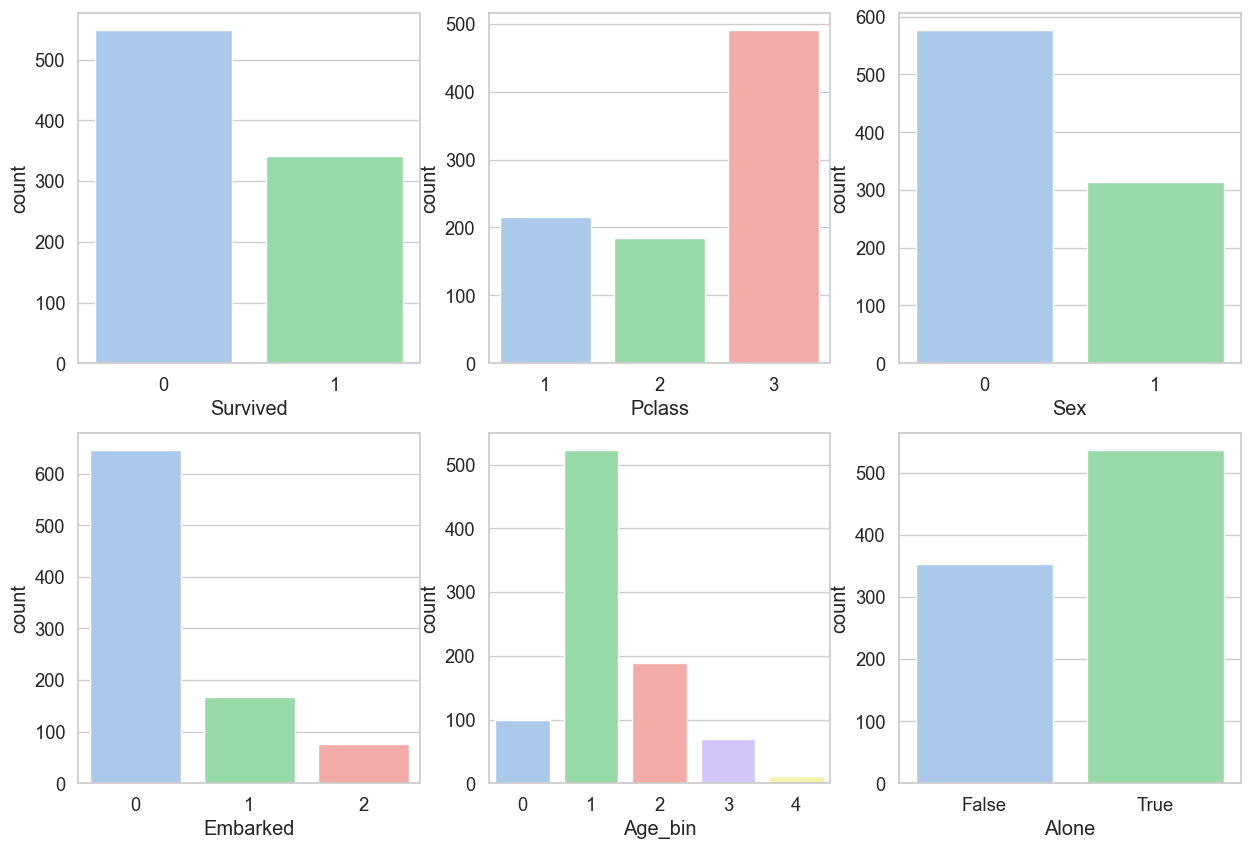

In [15]:
#survived, pclass, sex, embarked, age_bin, fare category, alone

categories = ["Survived", 'Pclass', 'Sex', 'Embarked', 'Age_bin', 'Alone']

_, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

it = 0
for i in range(2):
    for j in range(3):
        if it >= len(categories): break
        sns.countplot(data=titanic_dataset, x=categories[it], ax=axes[i][j], palette='pastel6')
        it += 1

plt.show()

Ваші висновки:

Я маю 6 катогеоріальних змінних, які показують важливу інформацію про пасажирів. Чи вони були самі, їх вік, клас, стать та чи вони вижили. \
Кожна категорія тут містить вцілому достатньо даних щоб провести базовий аналіз даних. \
Якщо їх об'єднати то можна буде побачити закономірності між виживанням пасажира та іншими атрибутами.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

32.204207968574636
29.69911764705882


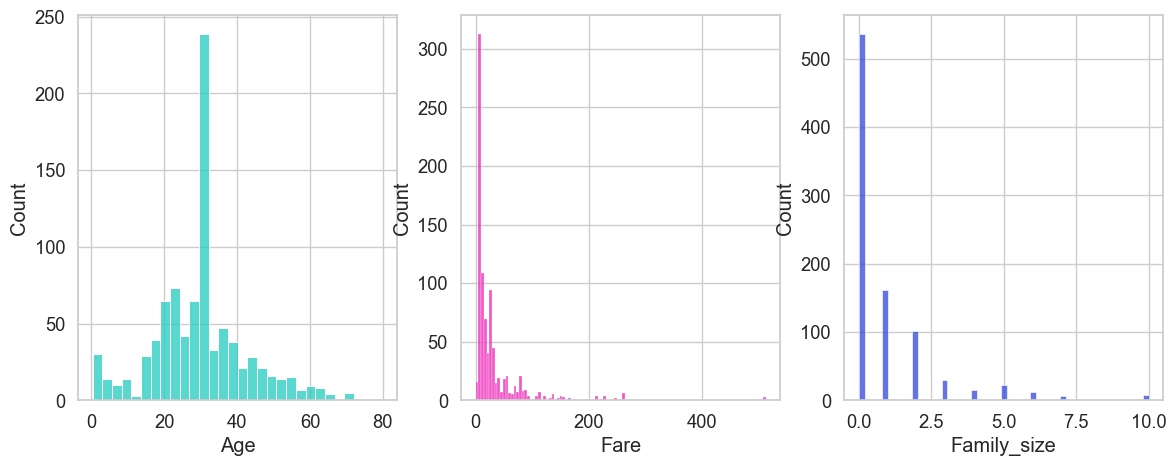

In [16]:
numbers_vars = ['Age', 'Fare', "Family_size"]

_, axes = plt.subplots(ncols=3, figsize=(14, 5))

print(titanic_dataset.Fare.mean())
print(titanic_dataset.Age.mean())

it = 0
colors = ["#21ccc1", "#eb21b8", "#3246db"]
for j in range(3):
    if it >= len(numbers_vars): break
    sns.histplot(data=titanic_dataset, x=numbers_vars[it], ax=axes[j], color=colors[j])
    it += 1

plt.show()

Ваші висновки:

У цих 3 графіках побудовані діаграми розподілу неперервних змінних, такі як: Вік (**бімодальний розподіл**), Ціна за квиток (**геометричний розподіл**) та кількість людей в сім'ї загалом (**експоненціальний розподіл**). \
Ще видно, що портрет середньо-статичного пасажира виглядає так: пасажир прибув на корабель сам, віком приблизно 30 років, \
з ціною на квиток приблизно в 30 одиниць.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

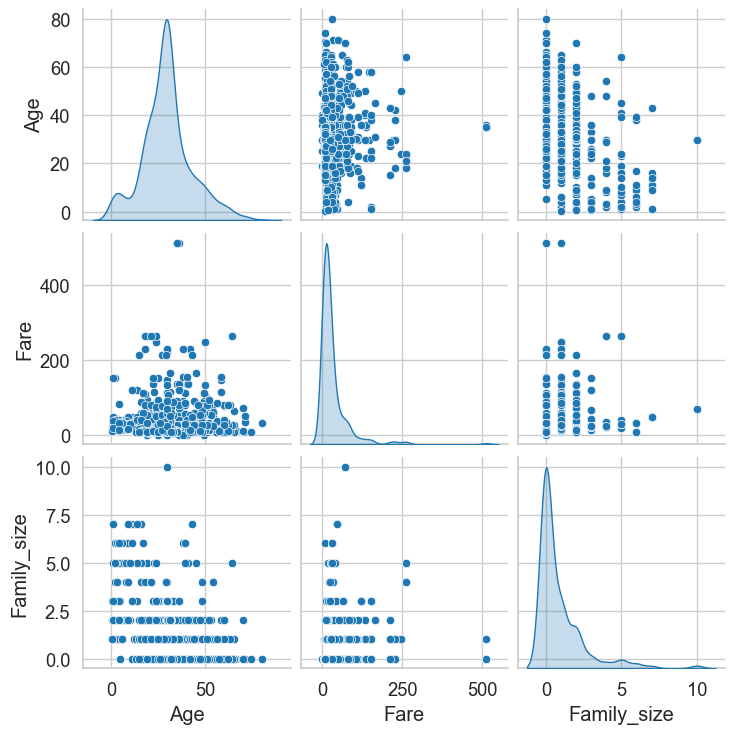

In [17]:
numbers_vars = ['Age', 'Fare', "Family_size"]

sns.pairplot(titanic_dataset[numbers_vars], diag_kind='kde')
plt.show()

Ваші висновки:

На ціх графіках ми можемо бачити різні кореляції між різними числовими змінними. \
До прикладу між **Family Size** та **Age** є кореляція, що розмір сім'ї залежив від віку пасажирів. Чим старша людина була, тим більше людей з \
її сім'ї було на борту. Між іншими атрибутами кореляція мінімальна. \
Що до викидів, ми можемо чітко побачити декілька аномальних значеннь по Ціні квитка та Віку пасажирів. \
Використовувати ці співвідношення можна, щоб проаналізувати залежності між зміннимим та виявлення взаємозв'язків. Або наприклад, чи впливає \
вік пасажира на Ціну квитка, або їх шанс на виживання.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.